In [ ]:
# For this part, you are given four options (detailed in next few slides). You can choose any two.
#For each of the options, you need to do
#exploratory data analysis (show at least 4-5 steps) and explain your learnings about the data fromthese steps
#Process the data (i.e. say do value replacement or data standardization), if needed. Explain why or why you did not process the data
#Choose independent features/attributes and explain why you chose the ones
#Create a model appropriate to the data; you can also create multiple models of the same type or
#different types and show the comparison – choose your model and explain why you chose it
#Show model’s metrics to help assess the quality of your model
#Interpret the model and explain learnings of your model
#Write a paragraph explaining your model’s learnings to a non-technical audience



In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

In [3]:
donate = pd.read_excel('donations.xlsx')


In [4]:
donate.head(10)

,Gender_Caller,Gender_Callee,Time_Slot_Called,Graduation_year,Donated_in_past,Donated_Amount,From_California,Day_ofCalling
0,F,M,5PM-9PM,2004.0,N,25.00,Y,TUESDAY
1,F,F,5PM-9PM,1986.0,Y,20.00,Y,TUESDAY
2,F,F,5PM-9PM,2007.0,N,25.00,Y,TUESDAY
3,NaN,F,5PM-9PM,2008.0,N,20.00,Y,TUESDAY
4,F,F,5PM-9PM,2008.0,N,20.08,Y,TUESDAY
5,F,M,5PM-9PM,2008.0,N,20.08,Y,TUESDAY
6,F,F,5PM-9PM,2008.0,N,5.00,Y,TUESDAY
7,F,M,5PM-9PM,2003.0,N,25.00,Y,TUESDAY
8,F,F,5PM-9PM,2004.0,Y,20.00,Y,TUESDAY
9,F,M,5PM-9PM,2007.0,N,5.00,Y,TUESDAY


In [5]:
#using info, we can see there are 194 data entries with several null values in Gender)Caller, Graduation_year and Donated_in_past

donate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender_Caller     152 non-null    object 
 1   Gender_Callee     194 non-null    object 
 2   Time_Slot_Called  194 non-null    object 
 3   Graduation_year   182 non-null    float64
 4   Donated_in_past   183 non-null    object 
 5   Donated_Amount    194 non-null    float64
 6   From_California   194 non-null    object 
 7   Day_ofCalling     194 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.2+ KB


In [6]:
#finding basic parameters of our numerical data
#the largest donated amount in our database is $194. However, the data does not appear to be normally distributed: the average is $10 but 50% of our data is 0. 
donate.describe()

,Graduation_year,Donated_Amount
count,182.000000,194.000000
mean,1986.439560,10.273814
std,20.749071,23.640439
min,1940.000000,0.000000
25%,1971.000000,0.000000
50%,1989.000000,0.000000
75%,2008.000000,14.250000
max,2008.000000,200.000000


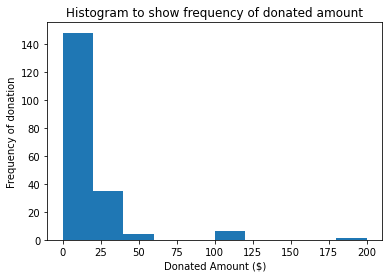

In [134]:
x= donate[['Donated_Amount']]

plt.hist(x)
plt.ylabel("Frequency of donation")
plt.xlabel("Donated Amount ($)")
plt.title("Histogram to show frequency of donated amount");



In [138]:
#A skew test corroborates the visualisation that the value is left (ie. positively) skewed.
#Over 0.5 suggests high positive skew. The skew test value is substantially over 1, suggesting highly positively skewed data

from scipy.stats import skew
print(round(skew(donate['Donated_Amount']),3))



4.45


In [38]:
#Part of the reason for this skew is that 115 people did not donate. This amounts to over half of our data set.

donate[donate['Donated_Amount']==0].count()

Gender_Caller        78
Gender_Callee       115
Time_Slot_Called    115
Graduation_year     114
Donated_in_past     115
Donated_Amount      115
From_California     115
Day_ofCalling       115
dtype: int64

In [12]:
#understanding what days donors are called and how many times they are called in each

donate['Day_ofCalling'].value_counts()



TUESDAY     91
SUNDAY      55
SATURDAY    48
Name: Day_ofCalling, dtype: int64

In [139]:
#understanding how much is donated in total on each day of calling, the average and the maximum donation

donate.groupby(['Day_ofCalling']).agg({'Donated_Amount': [np.sum, np.mean, np.max]})

Donated_Amount                  
                         sum       mean   amax
Day_ofCalling                                 
SATURDAY               50.00   1.041667   25.0
SUNDAY                976.84  17.760727  200.0
TUESDAY               966.28  10.618462  100.0

In [140]:
#from the data, there is a strong suggestion that future donor calls should not take place on Saturday as less money is raised and the average donation is much lower than on other days.
#This is despite the fact that a similar number of donors are reached on Sunday (where $976 was raised with 55 calls) and Saturday (where $50 = 19.5 times less - was raised with 48 calls) )
976/50

19.52

In [141]:
#understanding the categorical data

donate['Gender_Callee'].value_counts()

M    128
F     66
Name: Gender_Callee, dtype: int64

In [142]:
#observing differences between male and female donors.

donate.groupby("Gender_Callee").agg({'Donated_Amount': [np.mean,np.max, np.sum]})

Donated_Amount                
                        mean   amax      sum
Gender_Callee                               
F                   9.629697  100.0   635.56
M                  10.605937  200.0  1357.56

In [148]:
donated = donate[donate['Donated_Amount']>0]
donated['Gender_Callee'].value_counts()

M    47
F    32
Name: Gender_Callee, dtype: int64

In [147]:

print(47/128)
print(32/66)


0.3671875
0.48484848484848486


In [ ]:
#Far more men were phoned than women (almost double)
#The largest donation was made by a man and the total raised by male donors was over double women
#However, 48% of women phoned donated compared to only 37% of men
#The Average amount donated by men is higher than women, but only by $1
#Future donor calls should address the gender imbalance in Gender Callee as this could improve donation hit rates


In [31]:
#understanding the categorical data

donate['From_California'].value_counts()

Y    182
N     12
Name: From_California, dtype: int64

In [32]:
#observing differences between California and not

donate.groupby("From_California").agg({'Donated_Amount': [np.mean,np.max]})

Donated_Amount       
                          mean   amax
From_California                      
N                     7.923333   50.0
Y                    10.428791  200.0

In [149]:
donated['From_California'].value_counts()

Y    76
N     3
Name: From_California, dtype: int64

In [150]:
print(76/182)
print(3/12)

0.4175824175824176
0.25


In [ ]:
#Californians also donate more money on average and the difference between maximum cheque size between Californians and non is very large
#Callers should focus on Californians as they will have a higher donation hit rate (41% of Californians donated vs. 25% of non-californians)


In [42]:
#To create a column for yes or no donation with boolean variable

#create a function where if donation = 0, no donation (0); if donation is more than 0, they have donated and assign 1.
def donated(x):
    if x==0:
        return 0
    elif x>0:
        return 1
#applying out function to Donated Amonut and storing results in new columns donates
donate['donates'] = donate['Donated_Amount'].apply(donated)

#viewing data to check if it has worked
donate.sort_values(by = 'Donated_Amount', ascending = True)


,Gender_Caller,Gender_Callee,Time_Slot_Called,Graduation_year,Donated_in_past,Donated_Amount,From_California,Day_ofCalling,donates
96,NaN,M,12AM-4PM,1977.0,N,0.0,Y,SATURDAY,0
102,NaN,M,12AM-4PM,1983.0,N,0.0,Y,SATURDAY,0
103,NaN,F,12AM-4PM,1983.0,N,0.0,Y,SATURDAY,0
104,NaN,M,12AM-4PM,1958.0,N,0.0,Y,SATURDAY,0
105,NaN,F,12AM-4PM,2001.0,N,0.0,Y,SATURDAY,0
...,...,...,...,...,...,...,...,...,...
143,F,M,5PM-9PM,2002.0,Y,100.0,Y,SUNDAY,1
159,F,M,5PM-9PM,1967.0,Y,100.0,Y,SUNDAY,1
20,F,F,5PM-9PM,NaN,NaN,100.0,Y,TUESDAY,1
154,F,M,5PM-9PM,1976.0,Y,100.0,Y,SUNDAY,1


In [46]:
#find min mean and max amount for those who do donate we can see the minimum donation amount if $5, the average is $25 and the maximum is $200

donate[donate['donates']==1].agg({'Donated_Amount': [np.mean,np.min, np.max]})



,Donated_Amount
mean,25.229367
amin,5.000000
amax,200.000000


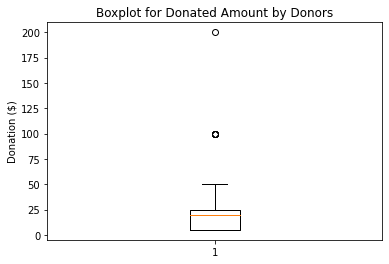

In [49]:
#creating a boxplot to visualise donation amounts by those who do donate
#from the visualisation we can see many donors donate between 1-25 with a long-tail of a few large cheque donors

donated = donate[donate['donates']==1]

plt.boxplot(donated["Donated_Amount"])
plt.title("Boxplot for Donated Amount by Donors")
plt.ylabel("Donation ($)");


In [52]:
donate.columns

Index(['Gender_Caller', 'Gender_Callee', 'Time_Slot_Called', 'Graduation_year',
       'Donated_in_past', 'Donated_Amount', 'From_California', 'Day_ofCalling',
       'donates'],
      dtype='object')

In [59]:
#turn all categorial data into numerical data to be able to find correlations between variables

donate["gender_call"] = donate["Gender_Caller"].map({"M":0, "F":1})
donate["gender_donate"] = donate["Gender_Callee"].map({"M":0, "F":1})
donate["past_donor"] = donate['Donated_in_past'].map({"Y":1, "N":0})
donate["cali"] = donate['From_California'].map({"Y":1, "N":0})
donate["day"] = donate['Day_ofCalling'].map({"TUESDAY":0, "SATURDAY":1, "SUNDAY":2})
donate["time"] = donate['Time_Slot_Called'].map({"5PM-9PM":0, "12AM-4PM":1})

donate.describe()


,Graduation_year,Donated_Amount,donates,gender_donate',gender_call,gender_donate,past_donor,cali,day,time
count,182.000000,194.000000,194.000000,152.000000,152.000000,194.000000,183.000000,194.000000,194.000000,194.000000
mean,1986.439560,10.273814,0.407216,0.855263,0.855263,0.340206,0.256831,0.938144,0.814433,0.247423
std,20.749071,23.640439,0.492587,0.352998,0.352998,0.475004,0.438084,0.241516,0.849625,0.432631
min,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1971.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1989.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2008.000000,14.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
max,2008.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [151]:
#observing correlation between different variables
donate[['Graduation_year','donates', 'gender_donate','gender_call', 'past_donor', 'cali', 'day','time']].corr()

,Graduation_year,donates,gender_donate,gender_call,past_donor,cali,day,time
Graduation_year,1.000000,0.292074,0.327409,0.023827,-0.193334,-0.029156,-0.548213,-0.364026
donates,0.292074,1.000000,0.113461,-0.048240,0.220932,0.082166,-0.028973,-0.329356
gender_donate,0.327409,0.113461,1.000000,-0.023298,-0.097288,-0.086604,-0.163725,-0.184810
gender_call,0.023827,-0.048240,-0.023298,1.000000,-0.070516,-0.109168,-0.252719,0.103203
past_donor,-0.193334,0.220932,-0.097288,-0.070516,1.000000,0.004142,0.551972,-0.293668
cali,-0.029156,0.082166,-0.086604,-0.109168,0.004142,1.000000,0.019524,0.097643
day,-0.548213,-0.028973,-0.163725,-0.252719,0.551972,0.019524,1.000000,0.125557
time,-0.364026,-0.329356,-0.184810,0.103203,-0.293668,0.097643,0.125557,1.000000


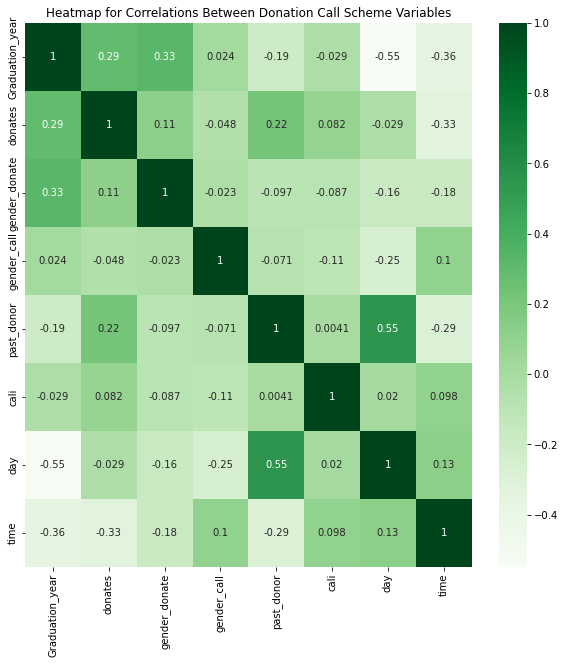

In [62]:
#creating a heatmap to visualise the correlation strength between variables

plt.figure(figsize= (10,10))
sns.heatmap(donate[['Graduation_year','donates', 'gender_donate','gender_call', 'past_donor', 'cali', 'day','time']].corr(), annot = True, cmap="Greens")
heatmap = plt.title("Heatmap for Correlations Between Donation Call Scheme Variables")



In [96]:

donate.columns



Index(['Gender_Caller', 'Gender_Callee', 'Time_Slot_Called', 'Graduation_year',
       'Donated_in_past', 'Donated_Amount', 'From_California', 'Day_ofCalling',
       'donates', 'gender_donate'', 'gender_call', 'gender_donate',
       'past_donor', 'cali', 'day', 'time'],
      dtype='object')

In [152]:
#creating a new view with our variables of interest - those that showed the highest correlation with donates
donate1= donate[['Graduation_year', 'past_donor', 'time', 'donates']]
donate1

,Graduation_year,past_donor,time,donates
0,2004.0,0.0,0,1
1,1986.0,1.0,0,1
2,2007.0,0.0,0,1
3,2008.0,0.0,0,1
4,2008.0,0.0,0,1
...,...,...,...,...
189,1973.0,1.0,0,0
190,1981.0,1.0,0,0
191,1995.0,1.0,0,0
192,1949.0,1.0,0,0


In [156]:

donate1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Graduation_year  182 non-null    float64
 1   past_donor       183 non-null    float64
 2   time             194 non-null    int64  
 3   donates          194 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.2 KB


In [157]:
#dropping entries with null values to obtain 182 entries with no nulls
donate2 = donate1.dropna()
donate2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 193
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Graduation_year  182 non-null    float64
 1   past_donor       182 non-null    float64
 2   time             182 non-null    int64  
 3   donates          182 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 7.1 KB


In [159]:
#defining our X variables as the variables with the highest correlation according to our Pearson correlation test with the 'donates' outcome

donate3 = donate2[['Graduation_year', 'past_donor', 'time']]

donate3.head()

,Graduation_year,past_donor,time
0,2004.0,0.0,0
1,1986.0,1.0,0
2,2007.0,0.0,0
3,2008.0,0.0,0
4,2008.0,0.0,0


In [161]:
#declare independent X varibales and dependent Y variable (donates)

X = donate3
Y = donate2[['donates']]



In [162]:
#train test split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                                                   test_size = .2, random_state = 42)

In [163]:
#Given most variables are 0-1 except graduation which has values in the 1000s, we need to scale X variables

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)




In [164]:

#import
from sklearn.neighbors import KNeighborsClassifier

#instantiate
knn = KNeighborsClassifier(n_neighbors = 5)

#fit it
knn.fit(scaled_X_train, Y_train)
# knn.fit(scaled_X_train, Y_train.values.ravel())

#predict
Y_pred = knn.predict(scaled_X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [165]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [181]:
#Evaluate
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75        22
           1       0.67      0.13      0.22        15

    accuracy                           0.62        37
   macro avg       0.64      0.54      0.49        37
weighted avg       0.64      0.62      0.54        37



In [182]:
#evaluate with a confusion metric

print(confusion_matrix(Y_test, Y_pred))

[[21  1]
 [13  2]]


In [184]:
#confirming our accuracy score
from sklearn.metrics import accuracy_score 
print(knn.score(scaled_X_test, Y_test))

print ("Accuracy : ", accuracy_score(Y_test, Y_pred))



0.6216216216216216
Accuracy :  0.6216216216216216


In [190]:
#Our model produced an accuracy score which shows that our model predicted 62% of values correctly. Equally corroborated by our classification report
#This indicates that Graduation_year, past_donor and time are useful in predicting whether a Callee will donate or not
#According ot our confusion matrix, the model produces many False Positives. In other words, it falsely predicted that 15 Callees from our test data would donate, when in fact only 2 did (a recall of 13%). 
#However, we can see from that from the Callees that out of those did not donate in our test data, our model correctly predicted 95% of these were non-donors.
#In other words, our model is much better at identifying Callees who do not donate.
#As such, Callees could use this model to initially screen the database for alumni that are unlikely to donate and prioritse the alumni who are identified in the model as unlikely to donate. 
#Whilst this would cause many high False Positive rates, it would allow for greater efficiency in reaching donors. 
#Moreover, if the scheme is looking to reduce calling days from Tuesday, Saturday and Sunday (building on previous insights), this initial screen could be an efficient method to fundraise the same quanutm in a shorter time frame by reducing time spent calling non-donors.


